<a href="https://colab.research.google.com/github/jcmachicao/deep_learning_2025_curso/blob/main/Tema01___RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 1: Subtema 1.3 Redes Neuronales Recurrentes (RNN)

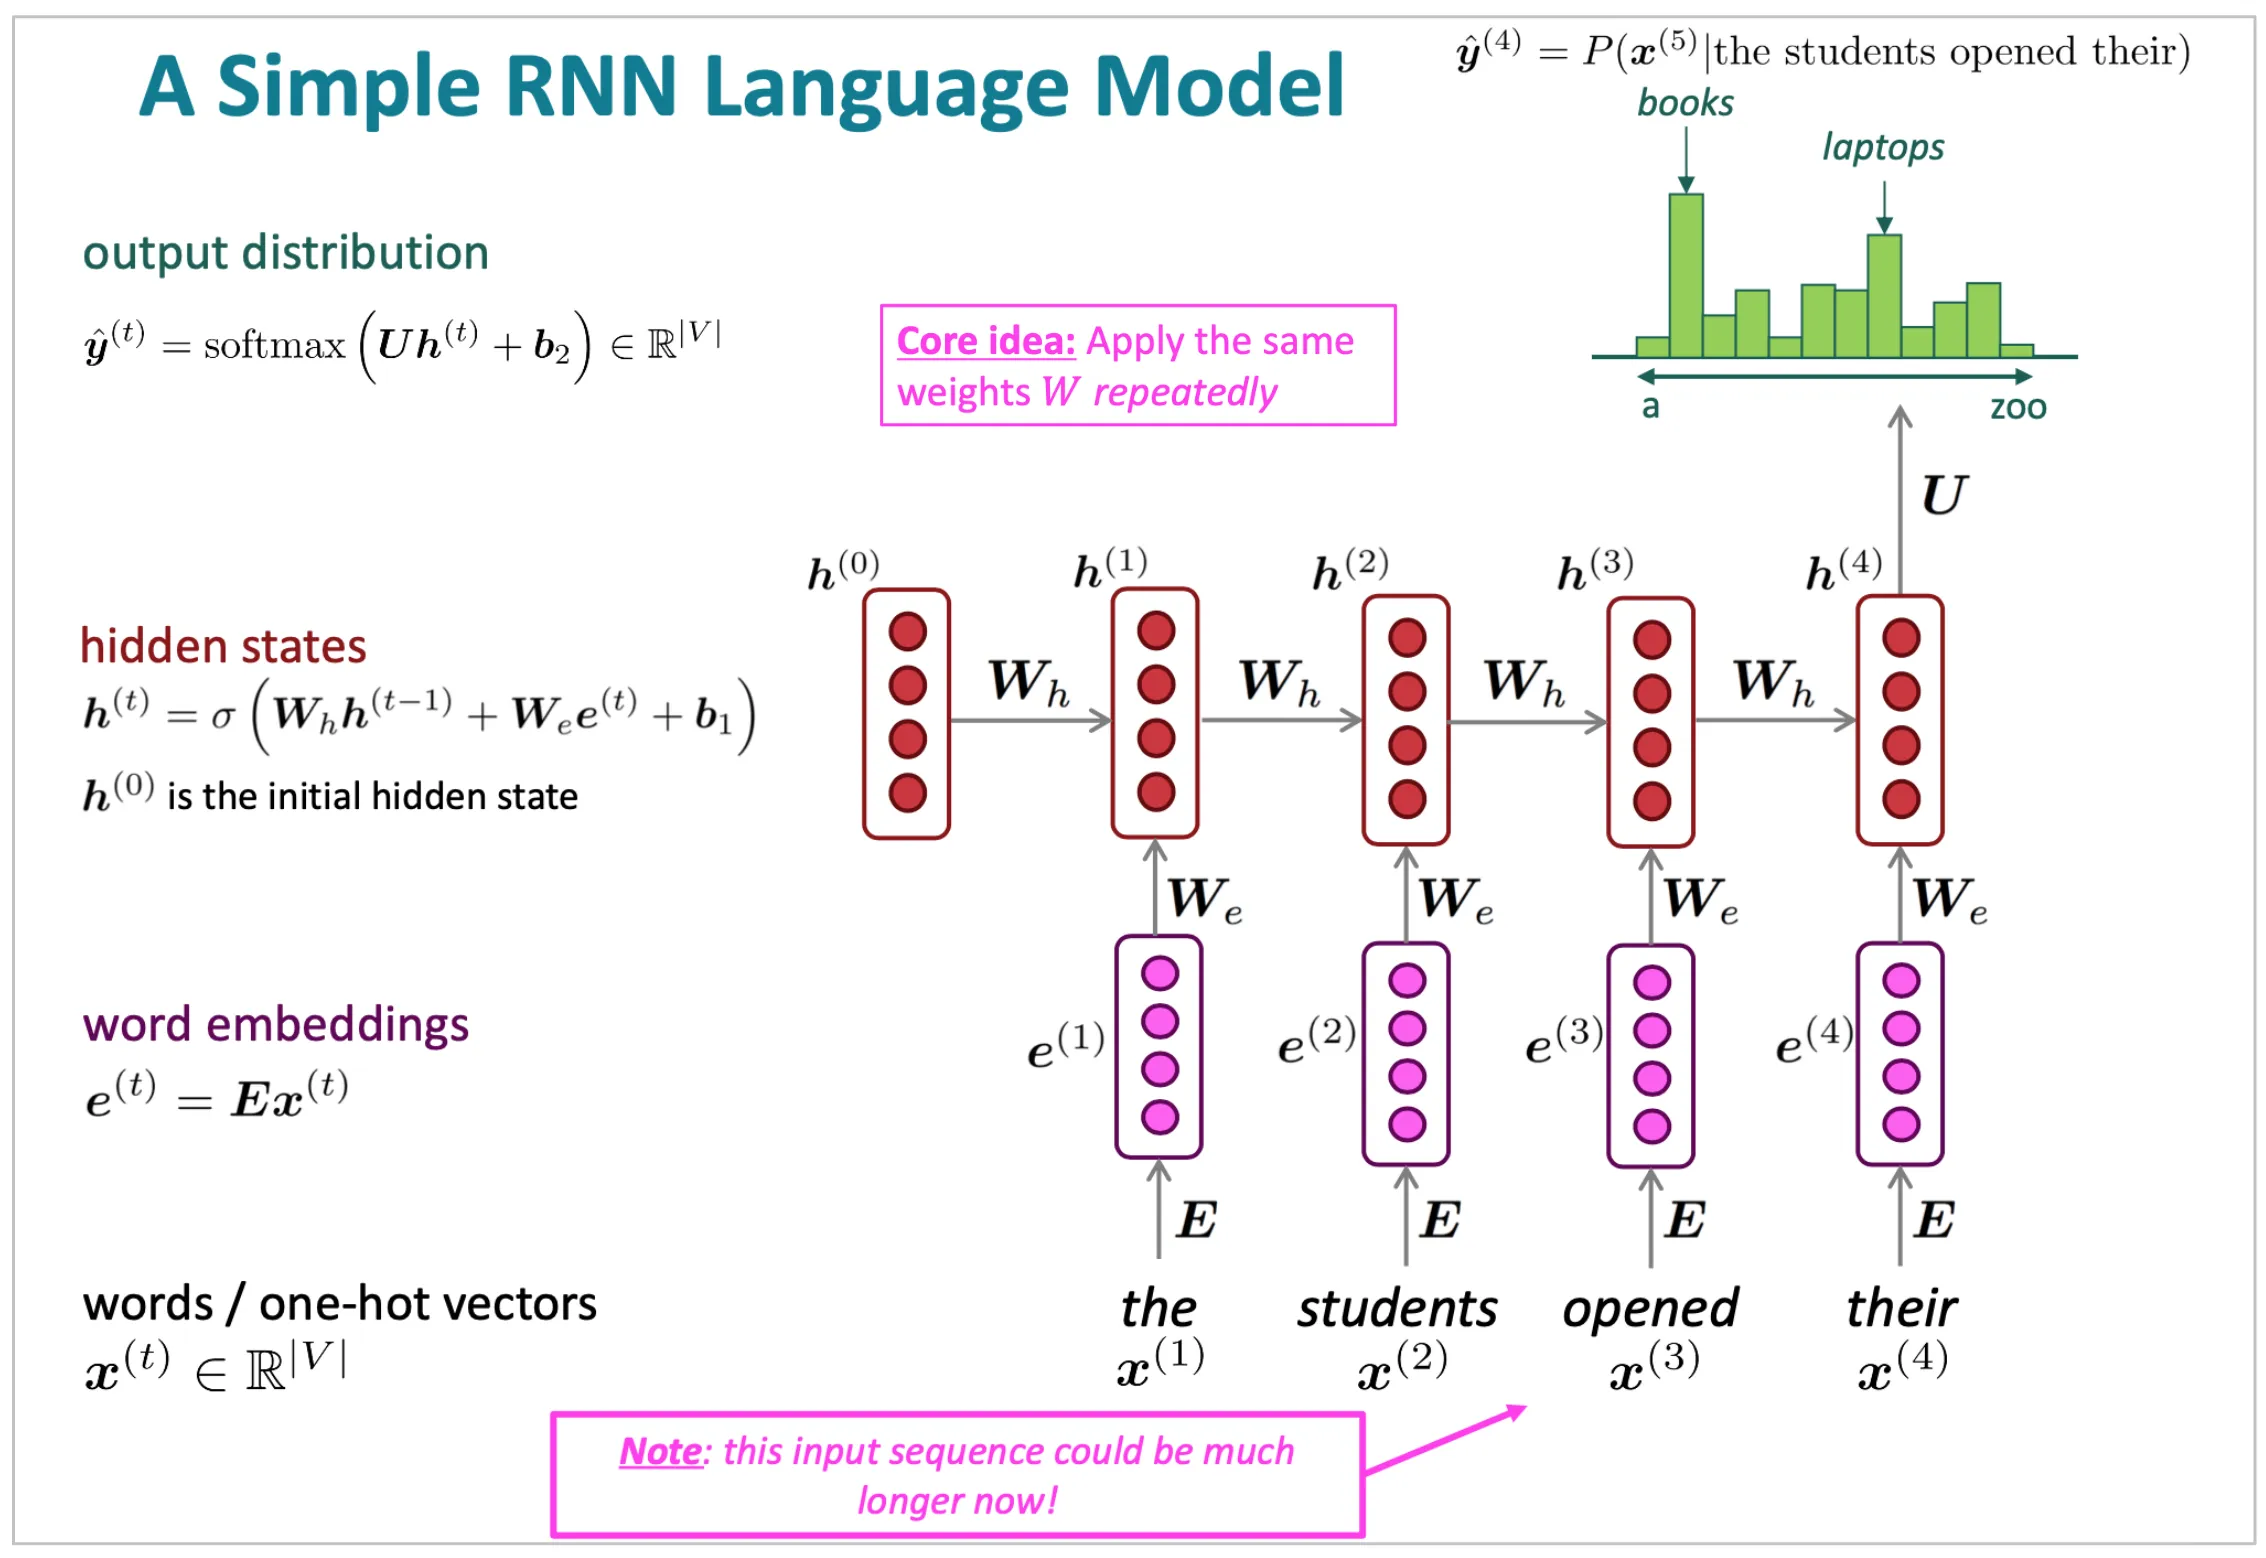

##Intuición para traducción de textos con RNN

###1. Escuchar palabra por palabra
* La red recibe el texto de origen (ej. en inglés) de manera secuencial.
* Cada palabra se procesa una tras otra, como si alguien leyera en voz alta.

###2. Mantener un recuerdo del contexto
* La red no solo entiende la palabra actual, sino que va guardando un “resumen” de lo que ya escuchó.
* Este resumen es como una memoria de corto plazo que se actualiza constantemente.

###3. Construir un sentido global
* Al final de la frase, el “resumen” contiene la idea completa, no solo las palabras sueltas.
* Ejemplo: si escuchó “the black cat”, lo que recuerda no es “the”, luego “black”, luego “cat”, sino la noción de un gato negro.

###4. Hablar en otro idioma
* Cuando empieza a generar la traducción (ej. en español), toma ese recuerdo global y lo convierte en nuevas palabras, una por una.
* También va ajustando su memoria mientras habla, para que la coherencia se mantenga (“el gato negro” y no “el negro gato”, dependiendo del idioma).

## PyTorch

In [4]:
import torch
import torch.nn as nn

# Definir la clase del modelo RNN simple
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()

        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Inicializar el estado oculto con ceros
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)

        # Pasar la secuencia a través de la capa RNN
        out, _ = self.rnn(x, h0)

        # Tomar la salida del último paso temporal y pasarla a través de la capa lineal
        out = self.fc(out[:, -1, :])
        return out

# Parámetros del modelo
input_size = 10  # Tamaño del vector de entrada en cada paso temporal
hidden_size = 20 # Tamaño del estado oculto
output_size = 5  # Tamaño del vector de salida

# Crear una instancia del modelo
model = SimpleRNN(input_size, hidden_size, output_size)

print(model)

SimpleRNN(
  (rnn): RNN(10, 20, batch_first=True)
  (fc): Linear(in_features=20, out_features=5, bias=True)
)


Este código define una clase `SimpleRNN` que hereda de `torch.nn.Module`.

- En el constructor `__init__`:
    - Se define una capa `nn.RNN` que toma el tamaño de la entrada (`input_size`), el tamaño del estado oculto (`hidden_size`) y `batch_first=True` para indicar que la dimensión del batch es la primera.
    - Se define una capa lineal `nn.Linear` que toma el tamaño del estado oculto (`hidden_size`) y lo mapea al tamaño de la salida (`output_size`).

- En el método `forward`:
    - Se inicializa el estado oculto `h0` con ceros.
    - Se pasa la entrada `x` y el estado oculto inicial `h0` a la capa RNN. La salida `out` contiene las salidas de todos los pasos temporales, y `_` contiene el estado oculto final (que no usamos en este ejemplo simple).
    - Se toma la salida del último paso temporal (`out[:, -1, :]`) y se pasa a través de la capa lineal para obtener la salida final.

Este modelo simple procesa una secuencia de entrada y produce una única salida al final de la secuencia.

## TensorFlow

In [1]:
!pip install keras

In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
# Definir los parámetros del modelo
input_size = 10  # Tamaño del vector de entrada en cada paso temporal
hidden_size = 20 # Tamaño del estado oculto (unidades en la capa SimpleRNN)
output_size = 5  # Tamaño del vector de salida

# Crear el modelo secuencial
model = Sequential([
    # Capa SimpleRNN
    # input_shape=(None, input_size) indica que la longitud de la secuencia puede ser variable (None)
    # y el tamaño de cada paso temporal es input_size.
    SimpleRNN(hidden_size, return_sequences=False, input_shape=(None, input_size)),
    # return_sequences=False significa que solo devuelve la salida del último paso temporal

    # Capa lineal (Dense) para mapear la salida de la RNN al tamaño de salida deseado
    Dense(output_size)
])

# Compilar el modelo (aunque no lo entrenaremos en este ejemplo)
model.compile(optimizer='adam', loss='mse')

# Mostrar un resumen del modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725 (2.83 KB)

 Trainable params: 725 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

Este código define una clase `SimpleRNN` que hereda de `torch.nn.Module`.

- En el constructor `__init__`:
  - Se define una capa `nn.RNN` que toma el tamaño de la entrada (`input_size`), el tamaño del estado oculto (`hidden_size`) y `batch_first=True` para indicar que la dimensión del batch es la primera.
  - Se define una capa lineal `nn.Linear` que toma el tamaño del estado oculto (`hidden_size`) y lo mapea al tamaño de la salida (`output_size`).
- En el método `forward`:
  - Se inicializa el estado oculto `h0` con ceros.
  - Se pasa la entrada `x` y el estado oculto inicial `h0` a la capa RNN. La salida `out` contiene las salidas de todos los pasos temporales, y `_` contiene el estado oculto final (que no usamos en este ejemplo simple).
  - Se toma la salida del último paso temporal (`out[:, -1, :]`) y se pasa a través de la capa lineal para obtener la salida final.

Este modelo simple procesa una secuencia de entrada y produce una única salida al final de la secuencia.